In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
file = 'price'
area = 'DK1'
fileName = file + "_" + area

file_uppercase = 'Price'
file_lowercase = 'price'

#config
save_plots = True

data = pd.read_csv("../../../data/data_sanitized/"+fileName+".csv") 
data['date']= pd.to_datetime(data['date'],format='%Y-%m-%d')
str_week_list = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
ylabel = file_uppercase+' [MWh]'
ylabelTWh = file_uppercase+' [TWh]'

title = {}
title['avg_consumption_each_year'] = 'Average '+file_lowercase+' for each hour for years 2016-2020 (' + area + ")"
title['total_consumption_2019'] = 'Total '+file_lowercase+' per day for 2019 (' + area + ")"
title['total_consumption_2016_2019'] = 'Total '+file_lowercase+' for years 2016-2019 (' + area + ")"
title['median_per_dayofweek'] = 'Median '+file_lowercase+' for years 2016-2020 (' + area + ")"
title['std_per_dayofweek'] = 'Standard deviation of '+file_lowercase+' for years 2016-2020 (' + area + ")"
global_title = 'Average '+file_lowercase+' for years 2016-2020 (' + area + ")"

data['dayofweek'] = data['date'].dt.dayofweek
data['year'] = data['date'].dt.year
data['dayofyear'] = data['date'].dt.dayofyear


data

,date,holiday,0,1,2,3,4,5,6,7,...,17,18,19,20,21,22,23,dayofweek,year,dayofyear
0,2016-01-01,1,122.29,119.68,117.44,116.18,115.43,117.52,114.61,114.68,...,142.59,139.38,133.78,131.99,129.31,124.98,121.25,4,2016,1
1,2016-01-02,0,5.00,73.86,112.14,95.28,84.09,88.86,94.16,103.19,...,123.18,122.14,119.97,120.50,118.11,118.03,114.23,5,2016,2
2,2016-01-03,1,52.15,-0.07,1.72,33.65,30.74,50.44,5.60,31.86,...,128.48,125.57,122.96,122.59,122.59,127.06,107.66,6,2016,3
3,2016-01-04,0,102.81,95.28,78.79,28.87,23.88,64.69,134.37,145.79,...,157.21,153.25,147.51,142.13,138.03,132.14,127.06,0,2016,4
4,2016-01-05,0,131.92,129.31,128.64,129.23,131.77,133.71,140.28,153.04,...,158.41,154.30,152.81,148.41,144.68,139.75,134.08,1,2016,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1589,2020-05-08,1,172.98,142.53,119.40,117.01,115.07,147.76,190.59,212.16,...,162.61,191.04,235.96,261.18,214.77,215.44,185.81,4,2020,129
1590,2020-05-09,0,160.50,154.60,155.87,154.68,159.38,158.03,157.51,157.51,...,157.51,201.24,273.17,253.62,211.01,197.06,171.09,5,2020,130
1591,2020-05-10,1,154.43,144.80,142.49,136.45,122.57,119.36,107.13,92.43,...,46.48,90.27,60.20,60.73,61.77,60.88,58.71,6,2020,131
1592,2020-05-11,0,43.19,15.07,0.97,-0.07,0.15,27.90,127.05,126.60,...,103.62,136.75,164.12,165.91,178.82,163.01,149.28,0,2020,132


In [3]:
def savePlot(name):
    if(save_plots):
        fileName = '../plots/'+ name + '_' + area
        plt.savefig(fileName, bbox_inches='tight')

In [4]:
def draw_plot_hour(data_serie):
    x_data = range(0, 24)
    # create figure and axis
    fig, ax = plt.subplots()
    fig.set_figheight(10)
    fig.set_figwidth(20)
    # plot each column
    # for column in columns:
    ax.plot(data_serie)
    # set title and legend
    ax.set_title('Plot')
    ax.legend()
    
def draw_plot_hour_for_year(data_frame, name='Plot', ylabel = 'y ax'):
    x_data = range(0, 24)
    # create figure and axis
    fig, ax = plt.subplots()
    fig.set_figheight(10)
    fig.set_figwidth(20)
    # plot each column
    data_frame = data_frame.reindex(index=data_frame.index[::-1])
    for index, row in data_frame.iterrows():
        ax.plot(data_frame.loc[index], label=data_frame.loc[index].name)
    # set title and legend
    ax.set_title(name)
    ax.legend(prop={'size': 20})
    ax.set_xlabel('Hour')
    ax.set_ylabel(ylabel)
    
def draw_two_plots_hour_for_year(data_frame, name=['Plot','Plot'], ylabel = 'y lab', global_title=global_title):
    x_data = range(0, 24)
    # create figure and axis
    fig, ax = plt.subplots(nrows=2)
    fig.set_figheight(10)
    fig.set_figwidth(20)
    st = fig.suptitle(global_title, fontsize="x-large")
    st.set_y(0.95)
    
    data_frame = data_frame.reindex(index=data_frame.index[::-1])
    for holiday, new_df in data_frame.groupby(level=0):
        for index, row in new_df.iterrows():
            ax[index[0]].plot(new_df.loc[index], label=new_df.loc[index].name[1])
            ax[index[0]].set_title(name[index[0]])
            # set title and legend
            ax[index[0]].legend(prop={'size': 15})
            ax[index[0]].set_xlabel('Hour')
            ax[index[0]].set_ylabel(ylabel)

def draw_7_plots_hour_for_year(data_frame, name='Plot', ylabel = 'y lab', global_title=global_title):
    x_data = range(0, 24)
    # create figure and axis
    fig, ax = plt.subplots(4, 2,sharey=True)
    fig.delaxes(ax[3,1])
    fig.set_figheight(14)
    fig.set_figwidth(20)
    fig.subplots_adjust(hspace=0.3)
    st = fig.suptitle(global_title, fontsize="x-large")
    st.set_y(0.95)
    
    data_frame = data_frame.reindex(index=data_frame.index[::-1])
    for workday, new_df in data_frame.groupby(level=0):
        plot_index = int(workday/2),int(workday%2)
        for index, row in new_df.iterrows():
            ax[plot_index].plot(new_df.loc[index], label=new_df.loc[index].name[1])
            ax[int(index[0]/2),int(index[0]%2)].set_title(name[index[0]])
            # set title and legend
            ax[plot_index].legend(prop={'size': 9})
            ax[plot_index].set_xlabel('Hour')
            ax[plot_index].set_ylabel(ylabel)
            ax[plot_index].yaxis.set_tick_params(labelleft=True)
            
def draw_plot_dayofyear(data_frame, name='Plot', ylabel = ylabel):
    # create figure and axis
    fig, ax = plt.subplots()
    fig.set_figheight(10)
    fig.set_figwidth(20)
    # plot each column
    for year, new_df in data_frame.groupby(level=0):
        ax.plot(data_frame.loc[year], label=year)
    # set title and legend
    ax.set_title(name)
    ax.legend(prop={'size': 15})
    ax.set_xlabel('Day of year')
    ax.set_ylabel(ylabel)
            
def draw_simple_barplot_for_years(data_frame, name='Plot', ylabel = ylabel):
    fig, ax = plt.subplots()
    min_val = min(data_frame.iloc[:,0])
    max_val = max(data_frame.iloc[:,0])
    margin = (max_val - min_val)*3/10
    plt.ylim([min_val - margin,max_val + margin])
    ax.bar(data_frame.index,data_frame.iloc[:,0])
    plt.xlabel('Year')
    plt.ylabel(ylabel)
    plt.title(name)
    ax.set_xticks(data_frame.index)
    
def draw_plot_single_dayofyear(data_frame, name='Plot', ylabel = ylabel):
    # create figure and axis
    fig, ax = plt.subplots()
    fig.set_figheight(10)
    fig.set_figwidth(20)
    # plot each column
    ax.plot(data_frame, label=data_frame.index)
    # set title and legend
    ax.set_title(name)
    ax.set_xlabel('Day of year')
    ax.set_ylabel(ylabel)
    ax.set_xticks(ax.get_xticks()[::14])

In [5]:
data_avg_by_year = data
data_avg_by_year['year']= data_avg_by_year['date'].dt.year
data_avg_by_year = data_avg_by_year.drop(columns=['holiday','date','dayofyear','dayofweek'])
data_avg_by_year = data_avg_by_year.groupby('year').mean()
data_avg_by_year

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
year,,,,,,,,,,,,,,,,,,,,,
2016,168.330000,161.609071,158.039235,155.623429,158.071148,166.884098,189.667650,218.260437,232.510628,228.962705,...,200.455710,200.216175,205.590546,225.360301,227.066749,221.826339,212.837678,202.871885,195.397377,180.054071
2017,183.516110,176.834329,172.482123,171.042877,175.008000,188.005562,217.789699,250.282740,264.031644,259.431110,...,220.781562,223.420384,233.342000,256.423562,261.366712,258.422247,245.833699,233.065589,221.713041,197.408384
2018,277.202055,263.309945,257.816630,255.117644,255.831342,274.063726,323.062356,370.344685,387.921178,376.470767,...,324.637425,329.729123,339.749479,369.796082,385.999041,383.857479,362.310411,342.121342,324.183616,292.838411
2019,242.422630,232.529644,224.255151,221.824164,223.864658,237.300658,283.778877,327.411397,340.704904,326.594986,...,276.359712,280.271041,291.335808,323.495397,342.681534,349.838493,333.728904,308.997753,290.931534,260.976219
2020,113.021053,103.222331,96.647556,92.827519,97.909398,111.215940,143.323910,174.497707,186.482857,169.416692,...,115.136015,114.402143,129.529398,166.946842,190.120977,190.099474,169.109398,153.113158,141.013835,125.197669


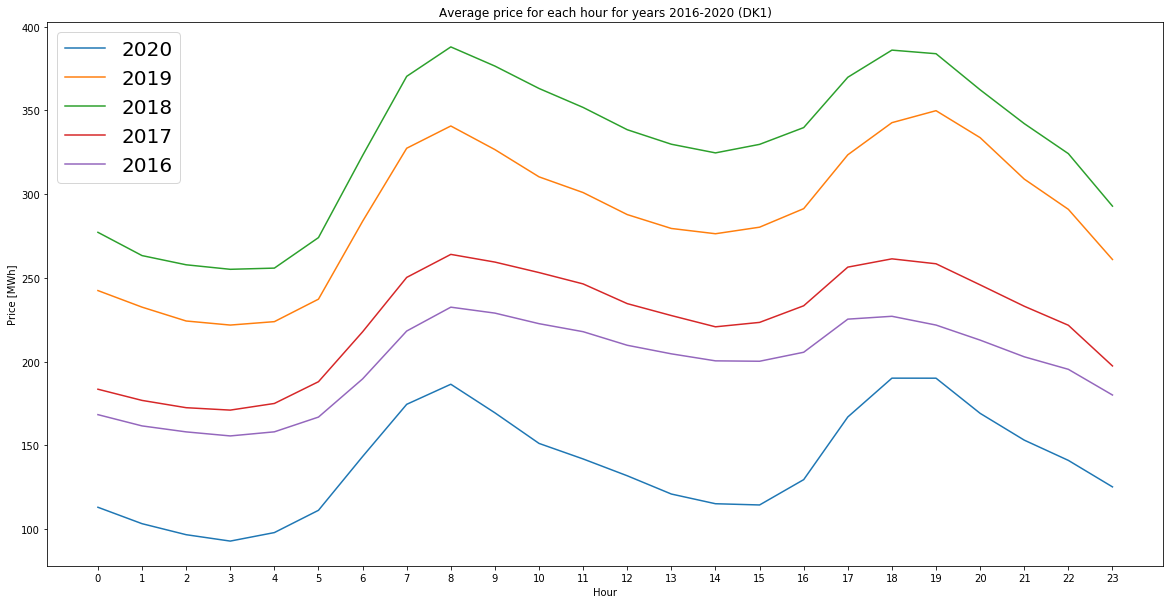

In [6]:
draw_plot_hour_for_year(data_avg_by_year, title['avg_consumption_each_year'], ylabel)
savePlot('avg_hour')

In [7]:
data_avg_by_year_per_holiday = data.copy()
data_avg_by_year_per_holiday = data_avg_by_year_per_holiday.drop(columns=['date','dayofyear','dayofweek'])
data_avg_by_year_per_holiday = data_avg_by_year_per_holiday.groupby(['holiday','year']).mean()
data_avg_by_year_per_holiday

0           1           2           3           4  \
holiday year                                                               
0       2016  172.290820  166.608525  162.919869  160.428344  163.365475   
        2017  187.840592  182.385888  177.741447  176.759079  181.583717   
        2018  281.944040  269.608742  264.141854  260.515199  261.548974   
        2019  246.375083  237.052376  230.750561  229.391287  233.335116   
        2020  114.857431  105.821376   99.678119   96.191009  101.343394   
1       2016  148.525902  136.611803  133.636066  131.598852  131.599508   
        2017  161.964590  149.167541  146.271721  142.555574  142.237213   
        2018  254.470635  233.115714  227.495714  229.243651  228.423016   
        2019  223.106613  210.426613  192.511452  184.842903  177.581613   
        2020  104.680833   91.418333   82.883750   77.551667   82.313333   

                       5           6           7           8           9  ...  \
holiday year                                                              ...   
0       2016  173.969344  200.724918  232.723049  248.238295  241.911672  ...   
        2017  196.042171  230.739836  266.559178  280.226842  272.895395  ...   
        2018  282.067715  339.048874  392.892119  409.391192  393.348974  ...   
        2019  248.475677  301.087195  349.883861  363.143498  344.392904  ...   
        2020  116.497706  155.341193  192.730550  205.694495  184.716514  ...   
1       2016  131.457869  134.381311  145.947377  153.872295  164.217869  ...   
        2017  147.954262  153.251311  169.167377  183.321148  192.330410  ...   
        2018  235.695397  246.428571  262.260159  285.001429  295.562540  ...   
        2019  182.687258  199.191452  217.586290  231.045323  239.614839  ...   
        2020   87.227917   88.745417   91.690208   99.230000   99.930000  ...   

                      14          15          16          17          18  \
holiday year                                                               
0       2016  210.396754  210.032197  215.010557  235.035607  235.083180   
        2017  232.494013  235.353618  243.456513  267.585296  269.160197   
        2018  336.797583  341.130497  350.004470  380.689238  396.009901   
        2019  290.422310  293.940165  303.238086  334.320792  352.354389   
        2020  130.086055  130.941743  142.949083  179.101468  202.390917   
1       2016  150.750492  151.136066  158.490492  176.983770  186.984590   
        2017  162.411311  163.949836  182.935246  200.797869  222.527049   
        2018  266.345873  275.074921  290.590635  317.578095  338.010476   
        2019  207.634435  213.468710  233.168226  270.590645  295.409355   
        2020   47.237917   39.284792   68.581667  111.744583  134.395000   

                      19          20          21          22          23  
holiday year                                                              
0       2016  227.550295  217.409115  206.937377  198.408197  184.125574  
        2017  263.572138  249.761053  235.955757  223.339770  198.705132  
        2018  392.578974  368.059437  346.703974  326.897980  294.846589  
        2019  358.455710  340.533762  314.051353  294.468812  263.848911  
        2020  199.362661  174.187431  157.218165  144.494128  128.129174  
1       2016  193.206557  189.980492  182.544426  180.343279  159.696557  
        2017  232.757213  226.261311  218.662131  213.606066  190.945902  
        2018  342.049683  334.751587  320.153810  311.171905  283.211905  
        2019  307.725323  300.472903  284.300323  273.644516  246.937097  
        2020  148.029167  146.046667  134.469583  125.207500  111.883750  

[10 rows x 24 columns]

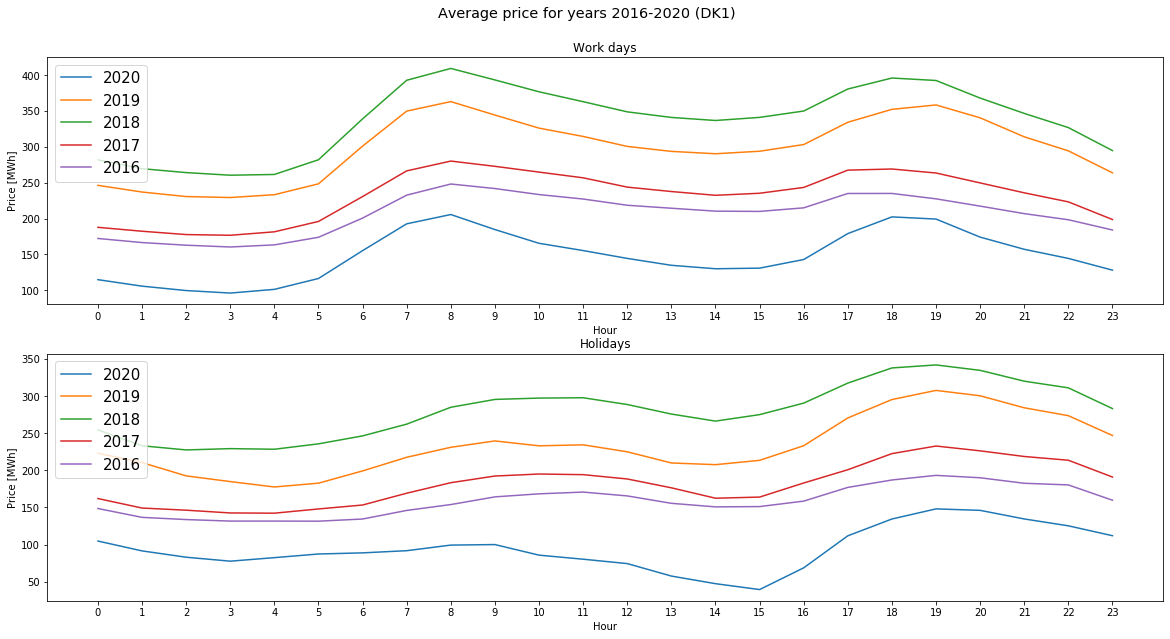

In [8]:
draw_two_plots_hour_for_year(data_avg_by_year_per_holiday, ['Work days','Holidays'], ylabel)
savePlot('avg_workday_holiday')

In [9]:
data_avg_by_year_per_dayofweek = data.copy()
df = data_avg_by_year_per_dayofweek
df = df.loc[(df['dayofweek'] == 6) | ((df['dayofweek'] != 6) & (df['holiday'] == 0))]
df = df.drop(columns=['holiday','date','dayofyear'])
df = df.groupby(['dayofweek','year']).mean()
data_avg_by_year_per_dayofweek = df
data_avg_by_year_per_dayofweek

0           1           2           3           4  \
dayofweek year                                                               
0         2016  170.109592  162.943878  158.835306  155.709796  154.389796   
          2017  180.997347  174.194490  170.880204  165.362653  168.307551   
          2018  264.083469  255.287551  243.705306  237.875918  238.882857   
          2019  222.685686  208.889804  203.658039  203.250000  206.288824   
          2020   77.457222   82.812222   85.450833   79.489444   87.856111   
1         2016  169.834615  161.908846  159.508077  156.237500  159.603654   
          2017  186.420588  188.272549  183.300588  184.908627  189.350980   
          2018  284.315200  270.804600  266.536800  262.005600  261.124000   
          2019  244.985882  240.476667  233.464902  230.957843  235.276863   
          2020  120.848947  105.631579   96.805263   86.754737   90.469474   
2         2016  176.814231  170.615769  167.100192  165.145000  168.772885   
          2017  183.132500  175.110769  170.580769  168.489808  174.754615   
          2018  278.982157  266.390980  261.829804  257.674706  261.892941   
          2019  248.387200  237.277600  232.418200  235.685400  241.895000   
          2020   95.276111   82.542222   76.087222   76.089444   84.544444   
3         2016  176.328800  169.446200  165.749000  163.289000  167.587200   
          2017  184.836000  179.445000  174.682400  176.731000  182.508400   
          2018  292.009400  278.007600  274.094000  269.949600  272.130600   
          2019  253.835510  246.901633  246.768163  247.246531  251.905918   
          2020  122.528333  116.800556  115.648889  117.424444  121.212222   
4         2016  170.032200  165.694600  160.640800  161.574000  169.498400   
          2017  195.763400  189.487000  185.554200  185.627200  197.254400   
          2018  280.480400  273.875800  270.669600  270.989800  272.378200   
          2019  262.311000  256.366200  248.081000  243.982200  252.714200   
          2020  136.028235  123.935882  104.958824  105.536471  112.237059   
5         2016  170.568077  168.904423  165.471346  160.496635  160.221346   
          2017  195.660769  187.606154  181.344423  179.274423  177.348077   
          2018  291.128269  272.930962  267.518077  264.057885  262.391346   
          2019  246.683654  233.246346  221.299038  216.586538  213.593077   
          2020  136.638947  123.254211  118.523684  112.015789  112.339474   
6         2016  155.325962  145.381154  142.655962  139.977308  139.679423   
          2017  164.333208  152.319434  149.441792  147.075094  145.259811   
          2018  265.437308  244.588462  238.800962  238.250000  236.873077   
          2019  219.529423  206.686731  189.638269  184.502308  181.261154   
          2020   90.077895   77.620000   74.417895   68.358421   71.968947   

                         5           6           7           8           9  \
dayofweek year                                                               
0         2016  168.811429  213.628571  250.644490  259.954694  250.946939   
          2017  191.179796  241.134082  276.691020  289.163878  277.632245   
          2018  270.481633  349.360204  411.351633  423.766327  405.310204   
          2019  231.115490  309.470588  369.573529  373.968431  345.025098   
          2020  102.559444  163.917778  211.974444  232.556667  210.069444   
1         2016  173.463846  203.594231  244.354423  264.136731  257.088077   
          2017  205.670000  242.502549  285.067451  298.750588  286.575098   
          2018  283.072600  350.746200  419.551400  441.657000  412.790600   
          2019  251.903922  316.919412  368.293333  382.439608  357.123922   
          2020  115.141053  162.476842  210.470000  212.022632  184.147368   
2         2016  180.643462  206.386538  237.983846  251.405000  242.886154   
          2017  194.035000  240.676538  293.148269  310.053654  297.978846   
          2018  283.264510  344.225098  406.68

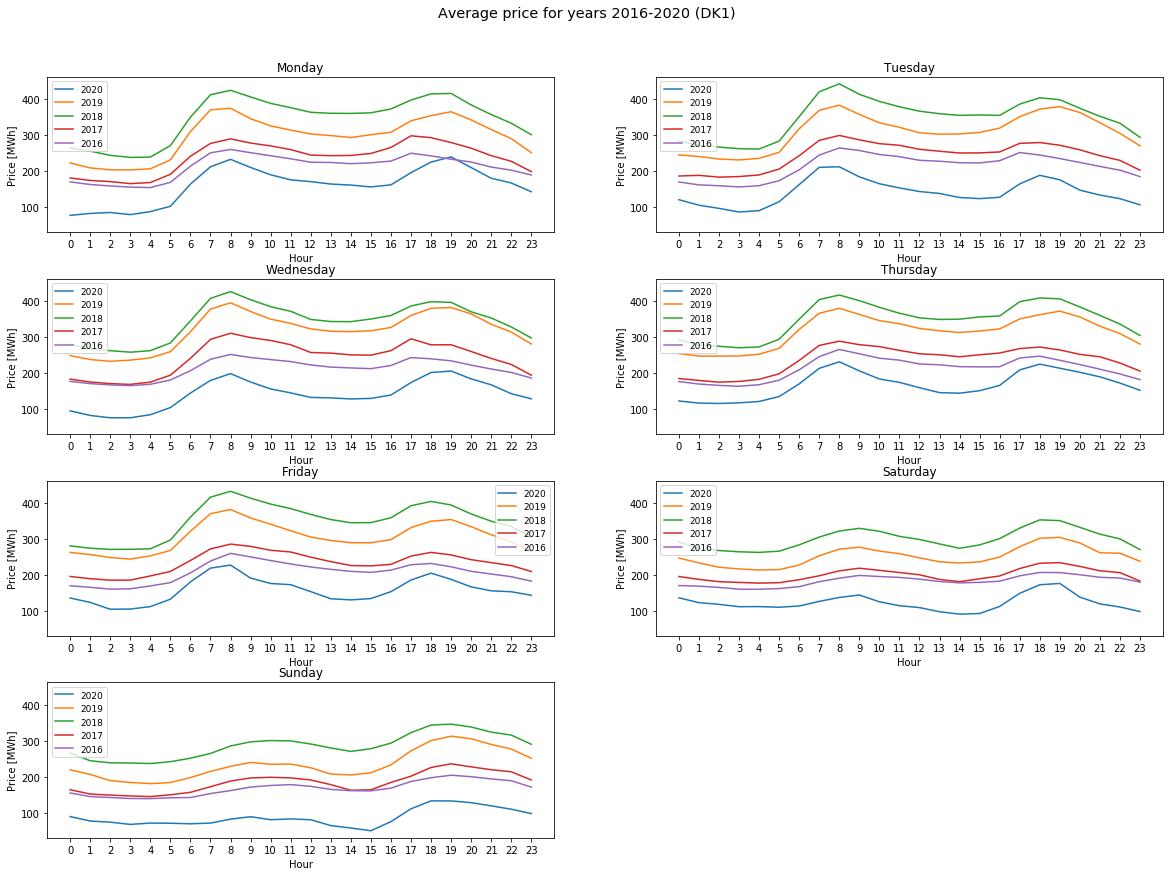

In [10]:
draw_7_plots_hour_for_year(data_avg_by_year_per_dayofweek, str_week_list, ylabel)
savePlot('avg_dayofweek')

In [11]:
data_std_by_year_per_dayofweek = data.copy()
df = data_std_by_year_per_dayofweek
df = df.loc[(df['dayofweek'] == 6) | ((df['dayofweek'] != 6) & (df['holiday'] == 0))]
df = df.drop(columns=['holiday','date','dayofyear'])
df = df.groupby(['dayofweek','year']).std()
data_std_by_year_per_dayofweek = df
data_std_by_year_per_dayofweek

0           1           2           3           4  \
dayofweek year                                                               
0         2016   47.141601   50.962473   52.749018   56.639863   57.077415   
          2017   67.451902   64.991835   63.734195   65.605983   65.581357   
          2018   97.442819   97.842244  105.271297  108.744025  103.273847   
          2019  100.270893  104.978959  109.376832  106.603800  100.859769   
          2020   67.686540   72.649201   74.022788   71.553881   71.072781   
1         2016   70.088810   76.044791   84.586767   95.730448   92.960017   
          2017   63.802422   54.944571   57.284789   54.566841   50.871001   
          2018   90.864858   91.958393   96.150009   97.752172   93.470924   
          2019   72.342840   73.691405   81.914991   82.423527   81.054336   
          2020   58.982453   54.038645   58.954427   60.168168   60.364735   
2         2016   45.857246   46.263087   48.514497   47.970046   44.382385   
          2017   60.637718   62.474663   64.885113   65.366278   62.668966   
          2018   91.268748   99.680153  103.341512  106.939190  103.223219   
          2019   98.318341  110.341340  112.989013  100.286696   93.601589   
          2020   61.918816   62.305253   64.933616   62.495683   55.053635   
3         2016   38.321307   39.033300   39.737329   41.808146   40.859001   
          2017   75.364064   69.643473   66.616181   61.332629   54.844301   
          2018   78.866319   82.030641   85.121016   87.411218   87.122148   
          2019   67.285460   66.105001   63.397074   65.971953   67.502320   
          2020   70.072056   70.406267   71.453262   72.043642   68.670061   
4         2016   53.258387   53.157590   52.197438   44.346862   37.759600   
          2017   55.170992   52.163861   54.473056   51.100761   35.344070   
          2018   91.954197   92.696391   90.844200   93.152785   91.315256   
          2019   58.319831   57.057857   64.021922   68.946349   61.464003   
          2020   72.990462   69.891840   71.237460   71.115639   71.103193   
5         2016   57.718443   46.655700   48.181972   49.801109   49.454391   
          2017   61.308485   58.061444   61.721811   62.480690   65.110503   
          2018   92.746350   92.382350   94.192665   94.321679   97.310616   
          2019   86.213481   88.656166   95.949932   96.277356   96.080606   
          2020   76.450640   73.474118   64.936865   64.320943   63.738757   
6         2016   68.204599   81.936157   83.307318   75.438026   69.615519   
          2017  105.972082  103.478235  104.626769   97.986436   94.706091   
          2018  107.627228  120.211997  118.741939  113.896155  112.597413   
          2019   94.863925   93.437327  100.650163  100.092153  102.068398   
          2020   76.136436   75.513757   74.967426   73.993821   72.583432   

                         5           6           7           8           9  \
dayofweek year                                                               
0         2016   51.822240   55.003018   72.602616   77.507780   74.516296   
          2017   54.026616   62.612722   82.384454   89.325449   83.789810   
          2018   89.235872   85.109850   96.014225  100.623895  101.011458   
          2019   89.462707   58.849936   67.720323   72.309034   73.884461   
          2020   68.331634   72.764630   78.717598   81.766054   85.263555   
1         2016   68.892065   66.698991   88.085370   96.360589   92.795885   
          2017   40.839352   33.970730   65.435436   83.910307   72.370805   
          2018   87.008018   96.765638  115.723762  144.173073  119.325251   
          2019   70.480724   57.308989   65.418119   73.216245   71.234839   
          2020   58.999077   63.031495   69.791443   75.327733   78.546322   
2         2016   43.253873   47.091091   70.212057   74.690352   70.091687   
          2017   52.181719   48.955287   98.833502  117.930678  103.901737   
          2018   94.081643   99.815254  108.54

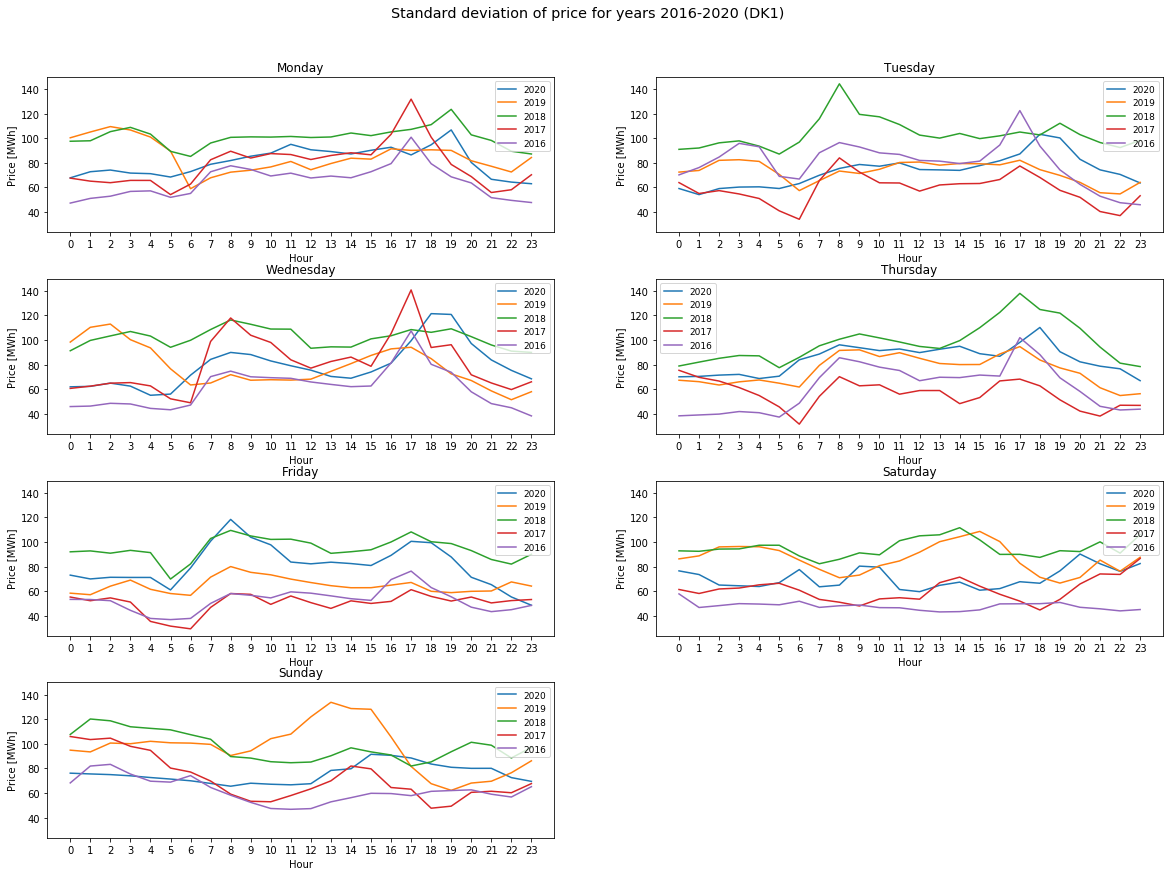

In [12]:
draw_7_plots_hour_for_year(data_std_by_year_per_dayofweek, str_week_list, ylabel, title['std_per_dayofweek'])
savePlot('std_dayofweek')

In [13]:
data_median_by_year_per_dayofweek = data.copy()
df = data_median_by_year_per_dayofweek
df = df.loc[(df['dayofweek'] == 6) | ((df['dayofweek'] != 6) & (df['holiday'] == 0))]
df = df.drop(columns=['holiday','date','dayofyear'])
df = df.groupby(['dayofweek','year']).mean()
data_median_by_year_per_dayofweek = df
data_median_by_year_per_dayofweek

0           1           2           3           4  \
dayofweek year                                                               
0         2016  170.109592  162.943878  158.835306  155.709796  154.389796   
          2017  180.997347  174.194490  170.880204  165.362653  168.307551   
          2018  264.083469  255.287551  243.705306  237.875918  238.882857   
          2019  222.685686  208.889804  203.658039  203.250000  206.288824   
          2020   77.457222   82.812222   85.450833   79.489444   87.856111   
1         2016  169.834615  161.908846  159.508077  156.237500  159.603654   
          2017  186.420588  188.272549  183.300588  184.908627  189.350980   
          2018  284.315200  270.804600  266.536800  262.005600  261.124000   
          2019  244.985882  240.476667  233.464902  230.957843  235.276863   
          2020  120.848947  105.631579   96.805263   86.754737   90.469474   
2         2016  176.814231  170.615769  167.100192  165.145000  168.772885   
          2017  183.132500  175.110769  170.580769  168.489808  174.754615   
          2018  278.982157  266.390980  261.829804  257.674706  261.892941   
          2019  248.387200  237.277600  232.418200  235.685400  241.895000   
          2020   95.276111   82.542222   76.087222   76.089444   84.544444   
3         2016  176.328800  169.446200  165.749000  163.289000  167.587200   
          2017  184.836000  179.445000  174.682400  176.731000  182.508400   
          2018  292.009400  278.007600  274.094000  269.949600  272.130600   
          2019  253.835510  246.901633  246.768163  247.246531  251.905918   
          2020  122.528333  116.800556  115.648889  117.424444  121.212222   
4         2016  170.032200  165.694600  160.640800  161.574000  169.498400   
          2017  195.763400  189.487000  185.554200  185.627200  197.254400   
          2018  280.480400  273.875800  270.669600  270.989800  272.378200   
          2019  262.311000  256.366200  248.081000  243.982200  252.714200   
          2020  136.028235  123.935882  104.958824  105.536471  112.237059   
5         2016  170.568077  168.904423  165.471346  160.496635  160.221346   
          2017  195.660769  187.606154  181.344423  179.274423  177.348077   
          2018  291.128269  272.930962  267.518077  264.057885  262.391346   
          2019  246.683654  233.246346  221.299038  216.586538  213.593077   
          2020  136.638947  123.254211  118.523684  112.015789  112.339474   
6         2016  155.325962  145.381154  142.655962  139.977308  139.679423   
          2017  164.333208  152.319434  149.441792  147.075094  145.259811   
          2018  265.437308  244.588462  238.800962  238.250000  236.873077   
          2019  219.529423  206.686731  189.638269  184.502308  181.261154   
          2020   90.077895   77.620000   74.417895   68.358421   71.968947   

                         5           6           7           8           9  \
dayofweek year                                                               
0         2016  168.811429  213.628571  250.644490  259.954694  250.946939   
          2017  191.179796  241.134082  276.691020  289.163878  277.632245   
          2018  270.481633  349.360204  411.351633  423.766327  405.310204   
          2019  231.115490  309.470588  369.573529  373.968431  345.025098   
          2020  102.559444  163.917778  211.974444  232.556667  210.069444   
1         2016  173.463846  203.594231  244.354423  264.136731  257.088077   
          2017  205.670000  242.502549  285.067451  298.750588  286.575098   
          2018  283.072600  350.746200  419.551400  441.657000  412.790600   
          2019  251.903922  316.919412  368.293333  382.439608  357.123922   
          2020  115.141053  162.476842  210.470000  212.022632  184.147368   
2         2016  180.643462  206.386538  237.983846  251.405000  242.886154   
          2017  194.035000  240.676538  293.148269  310.053654  297.978846   
          2018  283.264510  344.225098  406.68

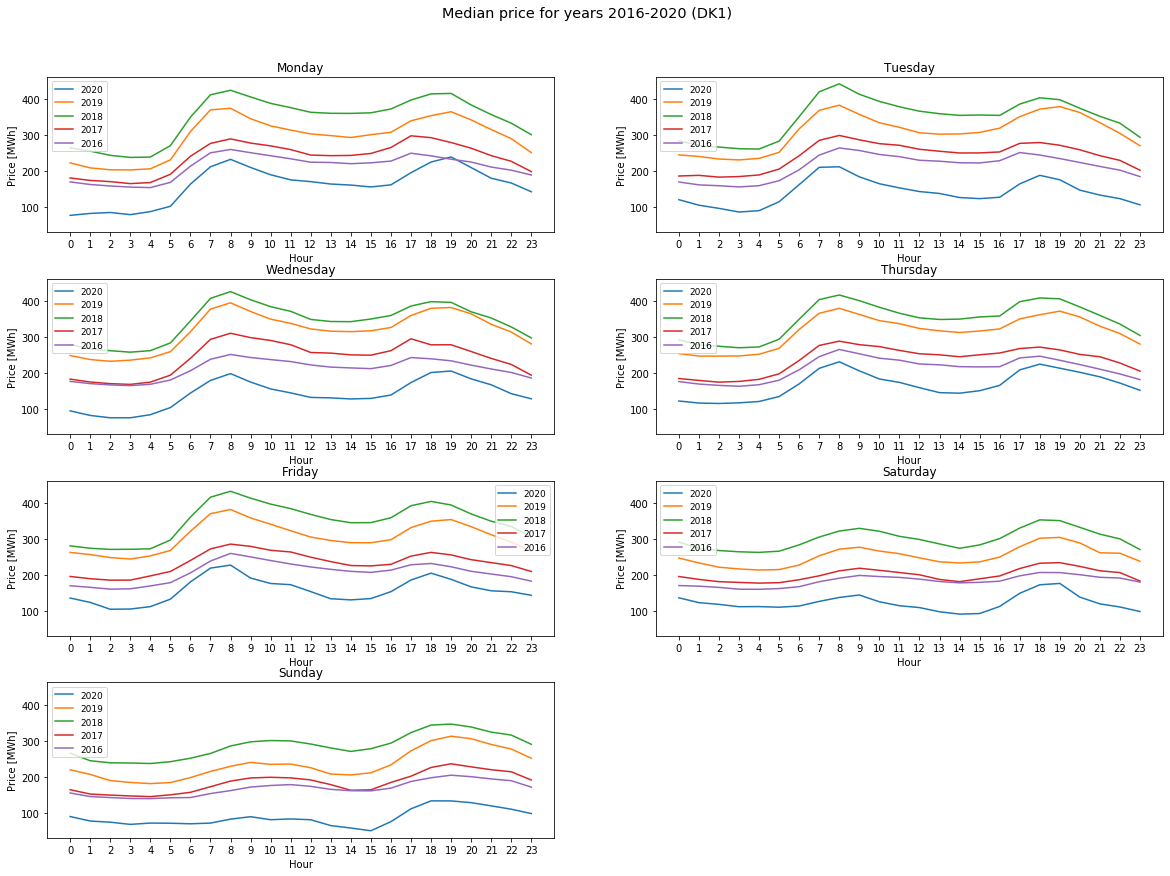

In [14]:
draw_7_plots_hour_for_year(data_median_by_year_per_dayofweek, str_week_list, ylabel, title['median_per_dayofweek'])
savePlot('median_dayofweek')

In [15]:
data_total_per_day_of_year = data.copy()
df = data_total_per_day_of_year
df = df.drop(columns=['holiday','date','dayofweek'])
# df.pivot(index=df.index,columns=['year','dayofyear'])
# df = df.melt('Date', var_name='X', value_name='Val')
df = df.set_index(['year','dayofyear']).stack().reset_index().rename(columns={"level_2": "hour"})
df = df.groupby(['year','dayofyear']).sum()
df['sma'] = df.rolling(14,min_periods=1).mean()
df = df.drop(columns=[0])
data_total_per_day_of_year = df
data_total_per_day_of_year

sma
year dayofyear             
2016 1          2976.070000
     2          2771.005000
     3          2549.956667
     4          2669.957500
     5          2843.884000
...                     ...
2020 129        3141.575714
     130        3216.752143
     131        3125.294286
     132        2984.240000
     133        2834.855000

[1594 rows x 1 columns]

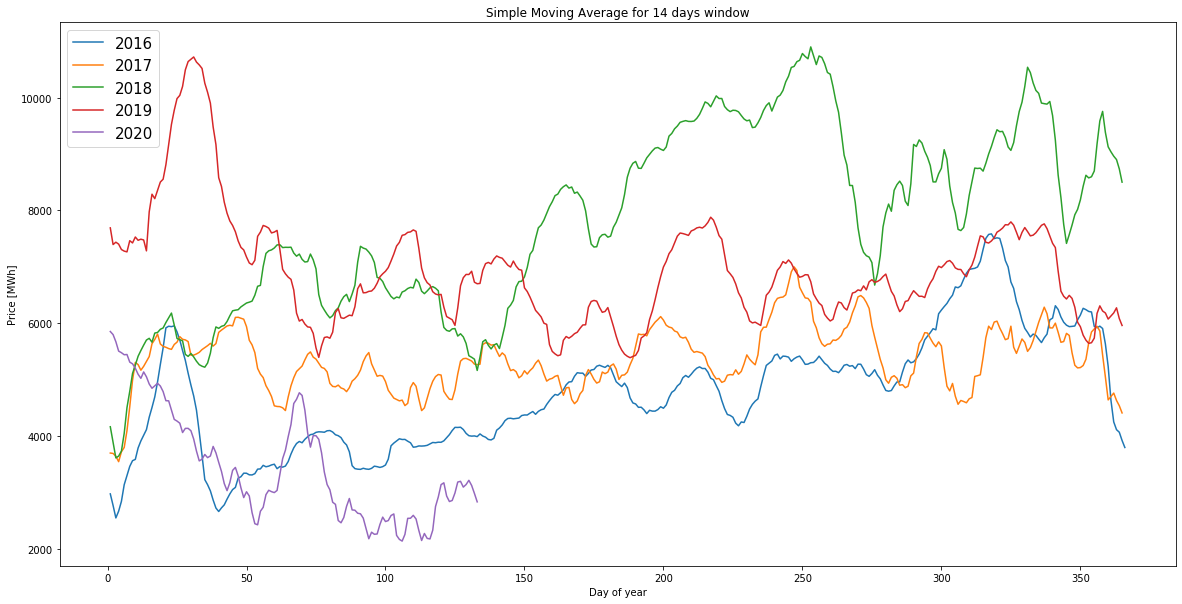

In [16]:
draw_plot_dayofyear(data_total_per_day_of_year, 'Simple Moving Average for 14 days window',ylabel)
savePlot('sma_14days')

In [17]:
data_total_per_day_of_year = data.copy()
df = data_total_per_day_of_year
df = df.drop(columns=['holiday','date','dayofweek'])
# df.pivot(index=df.index,columns=['year','dayofyear'])
# df = df.melt('Date', var_name='X', value_name='Val')
df = df.set_index(['year','dayofyear']).stack().reset_index().rename(columns={"level_2": "hour"})
df = df.groupby(['year','dayofyear']).sum()
df['sma'] = df.rolling(14,min_periods=1).mean()
df = df.drop(columns=[0])
data_total_per_day_of_year = df
data_total_per_day_of_year

sma
year dayofyear             
2016 1          2976.070000
     2          2771.005000
     3          2549.956667
     4          2669.957500
     5          2843.884000
...                     ...
2020 129        3141.575714
     130        3216.752143
     131        3125.294286
     132        2984.240000
     133        2834.855000

[1594 rows x 1 columns]

In [18]:
data_per_year = data.copy()
df = data_per_year
df = df.drop(columns=['holiday','date','dayofweek','dayofyear'])
df = df.set_index(['year']).stack().reset_index().rename(columns={"level_1": "hour"})
df = df.groupby(['year']).sum()
df.iloc[:,0] = df.iloc[:,0] / 1000000
df = df.iloc[:-1,:]
data_per_year = df
data_per_year

,0
year,
2016,1.743827
2017,1.960744
2018,2.876024
2019,2.517726


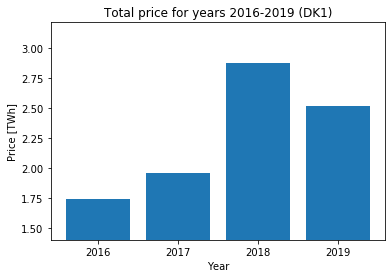

In [19]:
draw_simple_barplot_for_years(data_per_year,title['total_consumption_2016_2019'], ylabel = ylabelTWh)
savePlot('total_year')

In [20]:
data_one_year = data.copy()
df = data_one_year
df['day'] = df['date'].dt.strftime('%m-%d')
df = df[df.year == 2019]
# df = df.set_index(['day'])
df = df.drop(columns=['date','year','holiday','dayofweek','dayofyear'])
# df.pivot(index=df.index,columns=['year','dayofyear'])
# df = df.melt('Date', var_name='X', value_name='Val')
df = df.set_index(['day']).stack().reset_index()
df = df.groupby(['day']).sum()
data_one_year = df

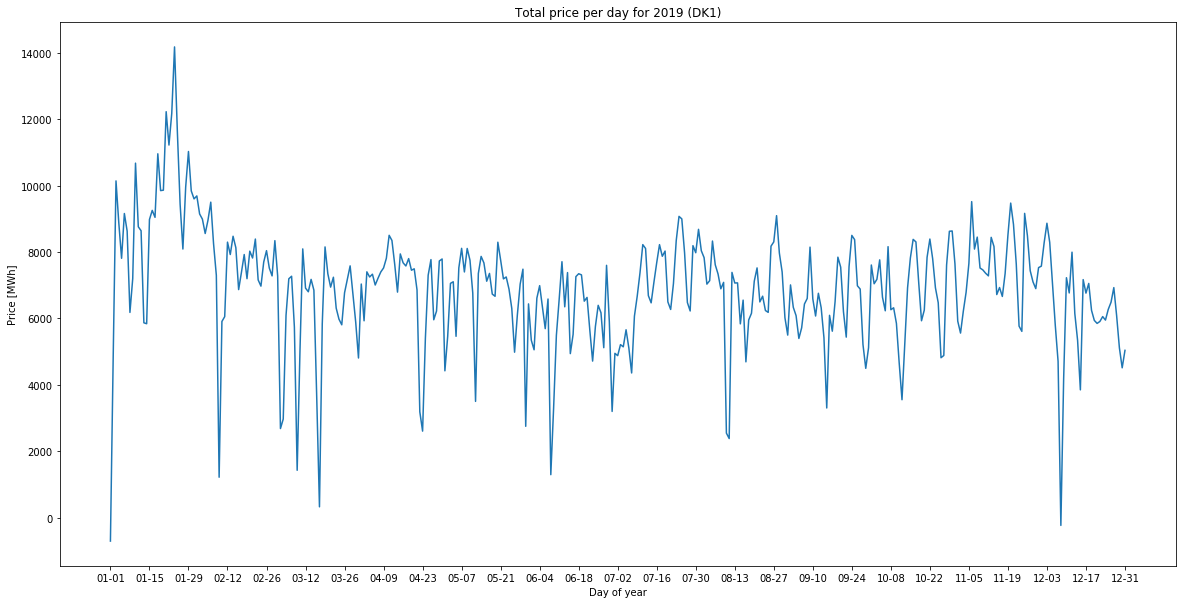

In [21]:
draw_plot_single_dayofyear(data_one_year, title['total_consumption_2019'])
savePlot('total_day_2019')